# Divorce Reasons

Interpretation & Analysis

Observations:
* Total 54 features as questions asked and a final answer/column : Divorced or not
* All answers are in a scale of 0-4
* Questions are ranked on a scale of 1-4 with 1 being the lowest and 4 being the highest

In [ ]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

from sklearn import manifold
from sklearn.metrics import accuracy_score

from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [ ]:
#Loading the dataset
df=pd.read_csv('C:/Users/zmerl/Downloads/next ML project/divorce.csv')

In [ ]:
#1st glance at the dataset
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [ ]:
df.shape

(170, 55)

170 participant in the survey

In [ ]:
#descriving the dataset
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


Interpretation: the data is normally distributed

In [ ]:
# Using 'with' to open and automatically close a file
with open('C:/Users/zmerl/Downloads/next ML project/New Text Document.txt') as file:
    # Read all lines from the file and store them in a list
    lines = file.readlines()
    #remove trailing whitespace as well as any spaces or tabs at the end of each line.
    lines = [line.rstrip() for line in lines]
    
    
# splits each line (x) into parts wherever there's a tab character ('\t')
# [1] selects the second part of the split line
# lines[2:] to skip header lines
que = [x.split('\t')[1] for x in lines[2:]]


# Descriptive statistics
values = dict()
#drop the classification column
que_cols = df.drop('Divorce_Y_N',axis=1).columns

#to calculate and store the relative frequencies of unique values in a column c in a dictionary format. 
#The resulting dictionary will have unique values as keys and their corresponding relative frequencies (in percentage form) as values
#rounds the percentages to two decimal
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))
    
#create a DataFrame from a dictionary (values), rename the columns of the DataFrame, and transpose it   
que_rate_df = pd.DataFrame(values).rename(columns=dict(zip(que_cols,que))).T


print(" -> Red highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")

# Highlighting the max & min values
 # Format the DataFrame to display percentages with one decimal place.
    # Highlight the maximum value in each row with red color.
     # Highlight the minimum value in each row with light green color.
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'red',axis=1)\
      .highlight_min(color = 'lightgreen',axis=1)

 -> Red highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,3,4,2,1
"If one of us apologizes when our discussion deteriorates, the discussion ends.",40.6%,27.6%,18.2%,8.2%,5.3%
"I know we can ignore our differences, even if things get hard sometimes.",34.7%,22.4%,12.9%,16.5%,13.5%
"When we need it, we can take our discussions with my spouse from the beginning and correct it.",30.0%,30.6%,10.0%,15.3%,14.1%
"When I discuss with my spouse, to contact him will eventually work.",44.1%,18.8%,12.3%,17.6%,7.1%
The time I spent with my wife is special for us.,48.2%,25.9%,15.3%,4.7%,5.9%
We don't have time at home as partners.,50.6%,2.4%,1.2%,17.1%,28.8%
We are like two strangers who share the same environment at home rather than family.,67.1%,2.4%,2.9%,2.9%,24.7%
I enjoy our holidays with my wife.,47.6%,21.8%,12.3%,12.3%,5.9%
I enjoy traveling with my wife.,49.4%,28.8%,10.0%,7.7%,4.1%
Most of our goals are common to my spouse.,36.5%,20.0%,10.6%,22.4%,10.6%


In [ ]:
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

no missing values

C:\Users\zmerl\AppData\Local\Temp\ipykernel_8312\2121975558.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
C:\Users\zmerl\AppData\Local\Temp\ipykernel_8312\2121975558.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

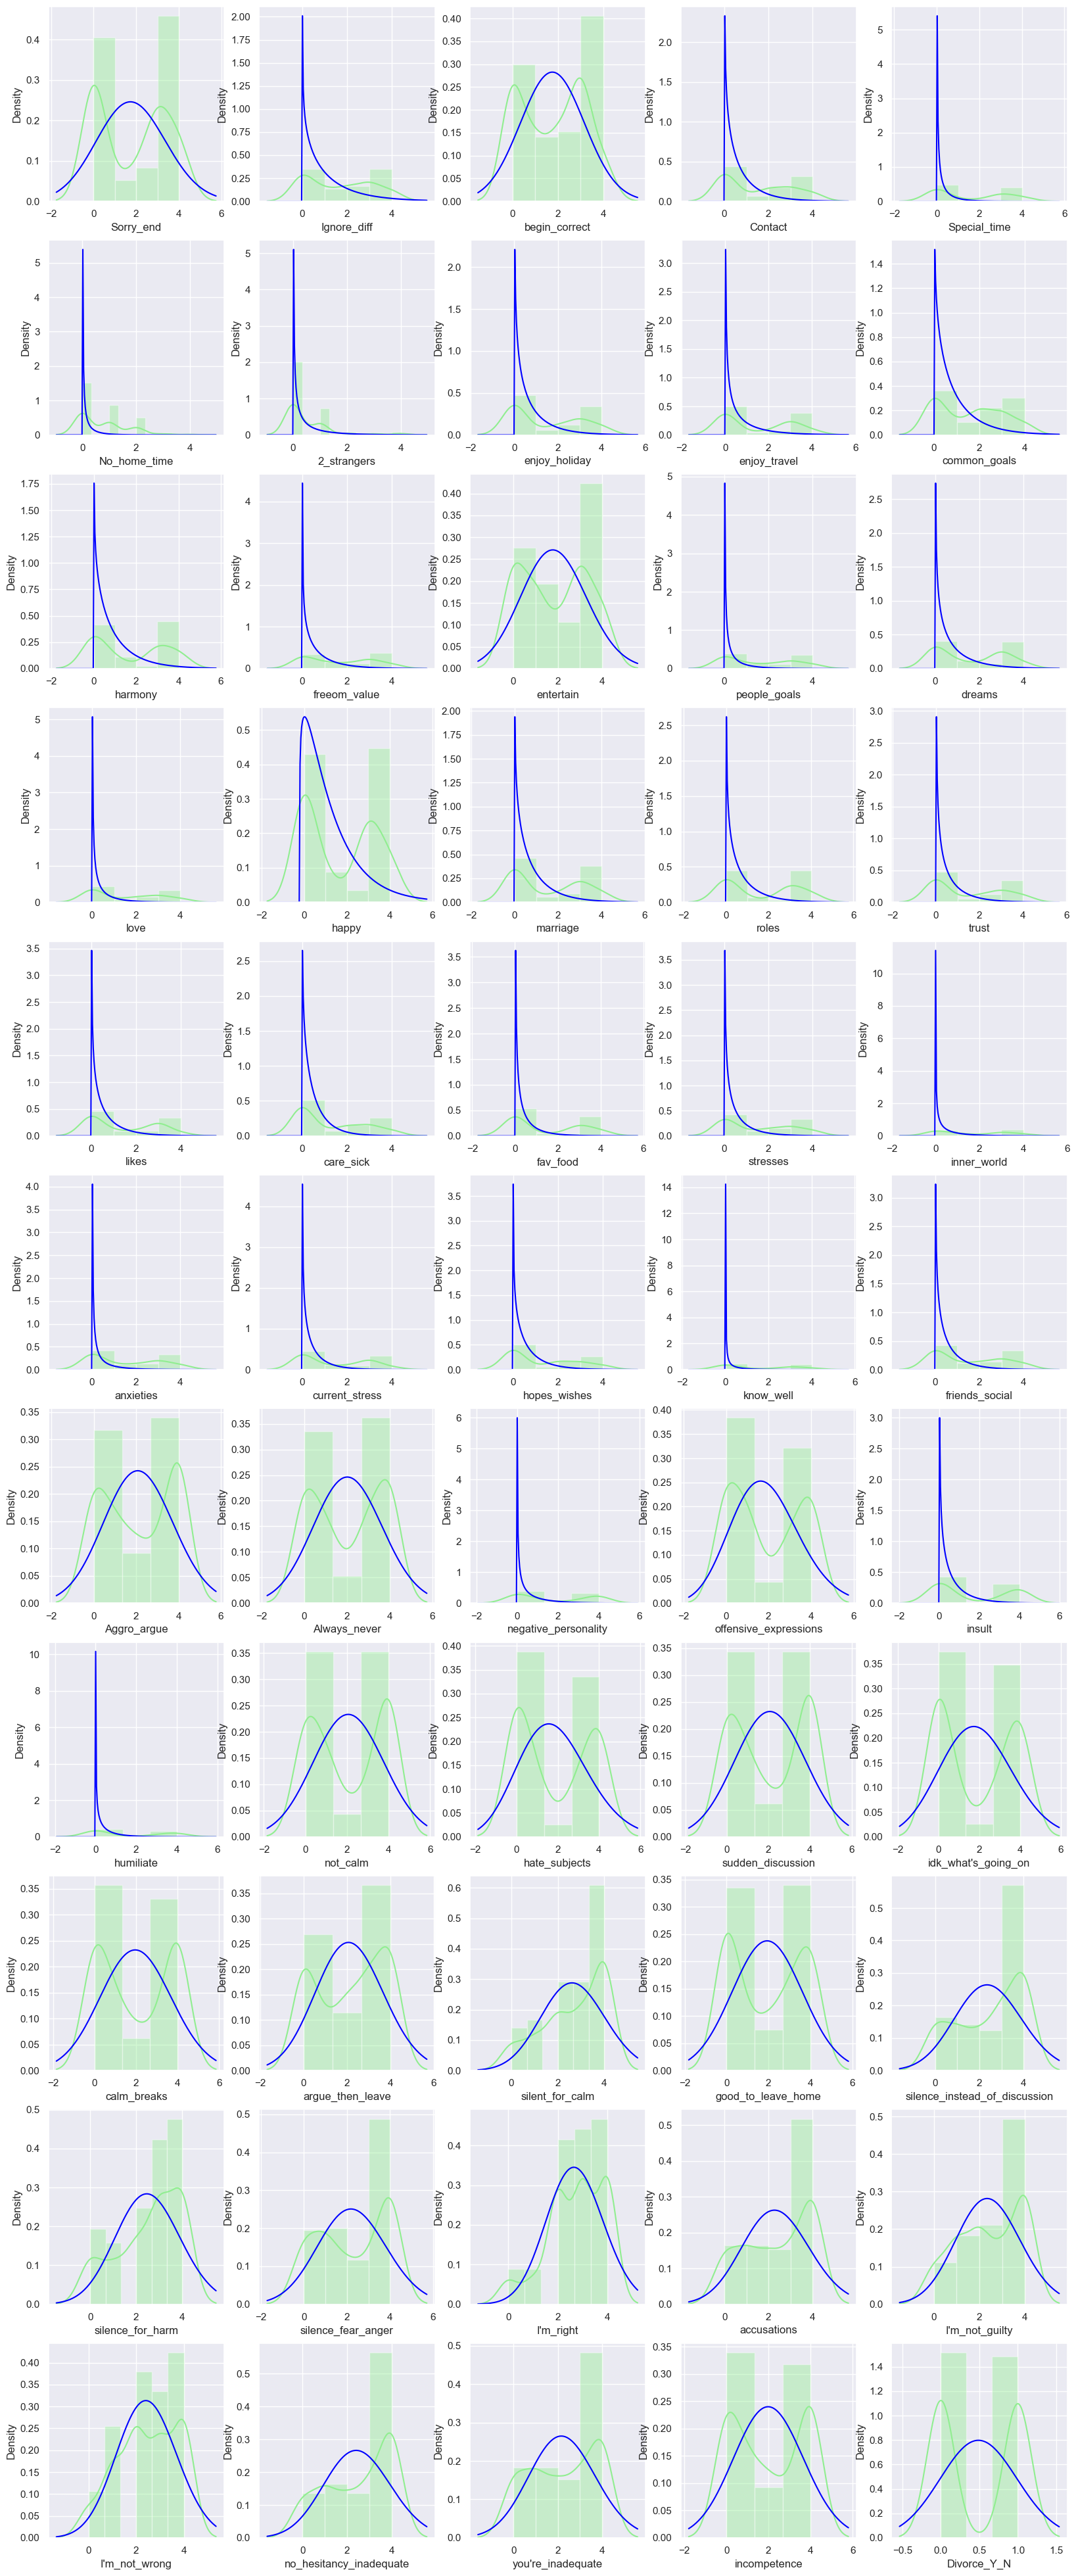

In [ ]:
col_names=list(df.columns)

#used to set the figure size for Seaborn plots
sns.set(rc={'figure.figsize':(20,50)})

# loop through the column names
for i, column in enumerate(col_names, 1):
    plt.subplot(11,5,i) # Create a subplot in a grid of 11 rows and 5 columns
    p=sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
    #fit=stats.gamma: This parameter specifies the probability distribution to use for fitting the curve.

Some feaured are very highly skewd on one side; some are skewed iin both sides.

### Co-Relation Analysis of All features
First 11 features

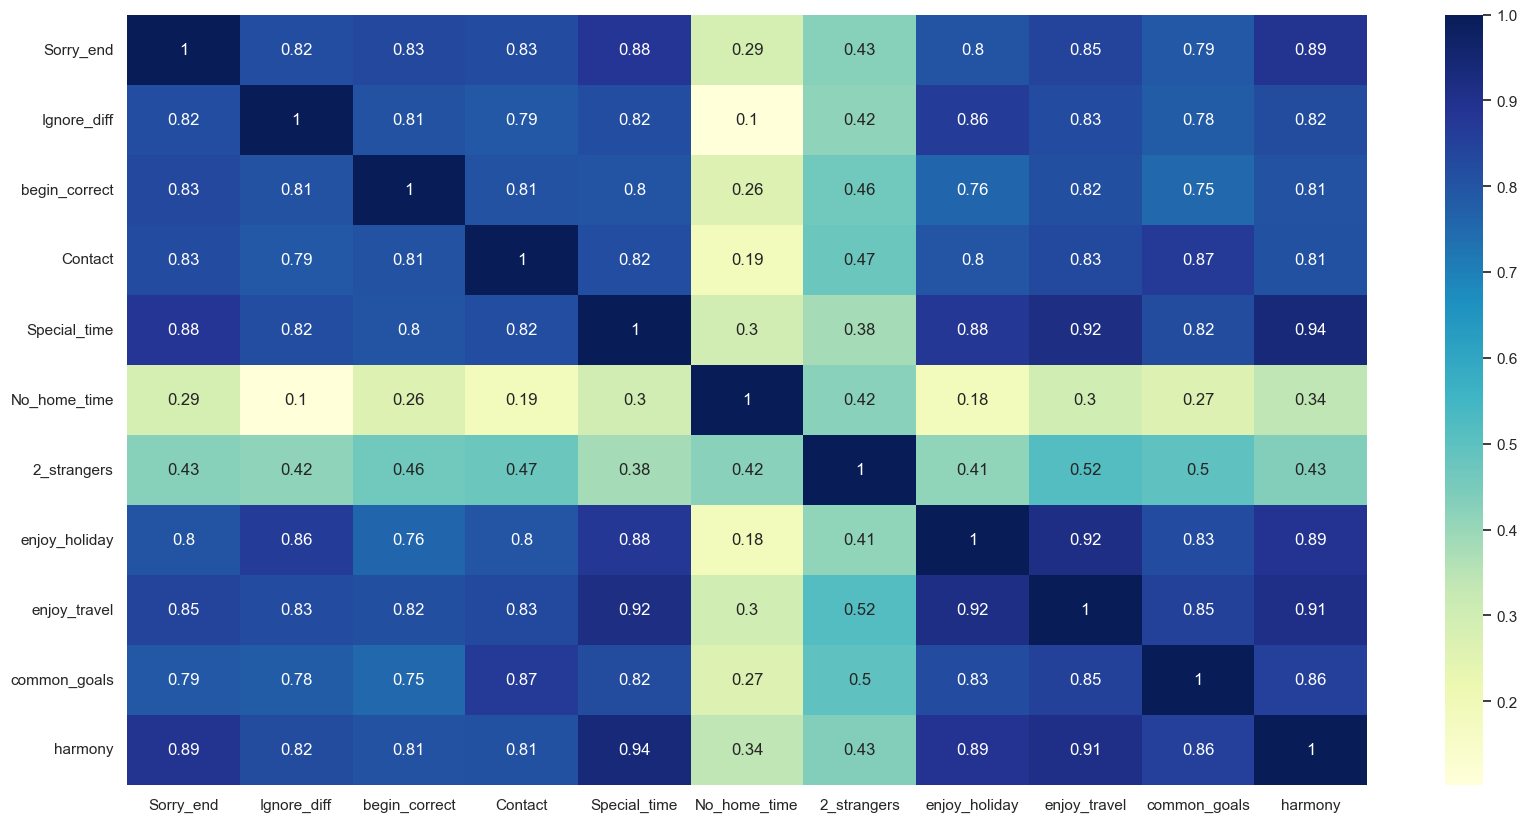

In [ ]:
#Rq:you can apply this code to the rest 44 features
corr=df[col_names[:11]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu" , annot = True)


Insights
some features are highly corelated, some are not.

#### Co-Relation Analysis of Target with features

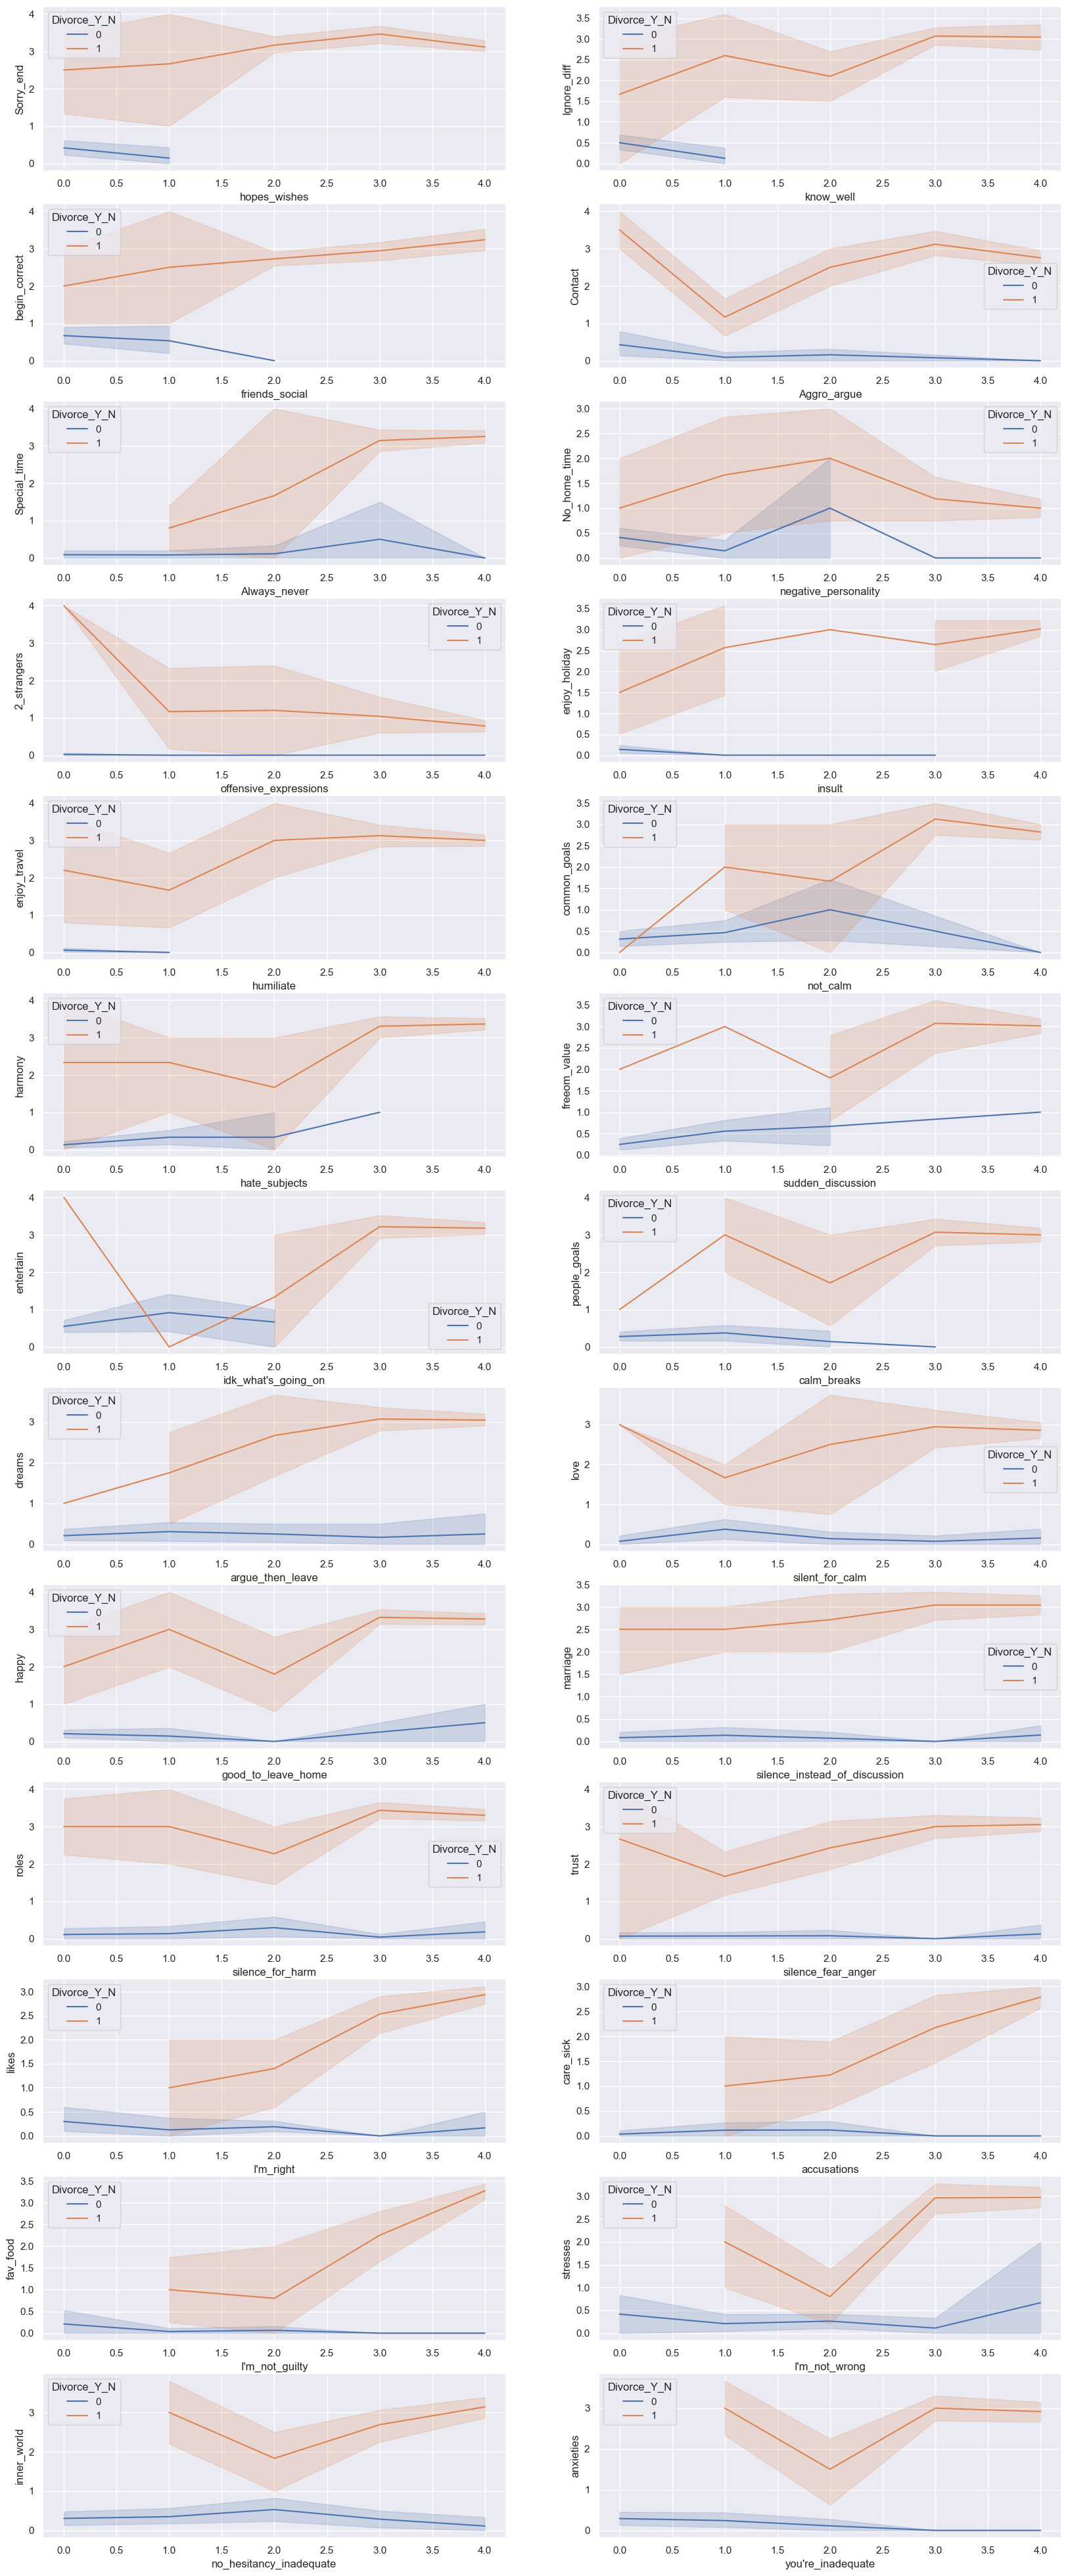

In [ ]:
#Each line represents the relationship between the specified x and y variables for a specific value of Divorce_Y_N
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(col_names[:26], 1):
    x=col_names[i+26]
    plt.subplot(13,2,i)
    p=sns.lineplot(hue='Divorce_Y_N',x=x,y=column,data=df,color='blue')

Insights
We can detect linearly seperable sections here.

###  Primary Modeling

In [ ]:
#Train-test split
X=df[col_names]
Y=df['Divorce_Y_N']

In [ ]:
#pip install xgboost


In [ ]:
#conda install -c anaconda py-xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree
import xgboost as xgbcx

In [ ]:
#Modeling
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.15,random_state=3)
#What made him choose these parameters ? How did he know the best parameters to use
xgb = XGBClassifier(learning_rate=0.02,subsample=0.8,min_child_weight=0.5,max_depth=4,gamma=1,colsample_bytree=0.8, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,random_state=3)
xgb.fit(train_X, train_Y)

[08:46:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, nthread=1, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
#evaluating the model's performance on the training data using 5-fold cross-validation.
scores = cross_val_score(xgb, train_X, train_Y, cv=5)

#The model is trained and tested "k" times, with each of the "k" folds used as the test set once 
#while the remaining "k-1" folds are used for training in each iteration.
kfold = KFold(n_splits=10, shuffle=True)

#evaluates the model's performance on the testing data using 10-fold cross-validation.
kf_cv_scores = cross_val_score(xgb, test_X, test_Y, cv=kfold )


[08:46:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:25] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:26] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:27] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:29] WARNING: 

In [ ]:
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean());

Mean cross-validation score: 1.00
K-fold CV average score: 0.97


In [ ]:
training_sizes = []
train_scores = []
val_scores = []

for i in range(10, 101, 10):  # Train on 10%, 20%, ..., 100% of the training data
    subset_size = int(len(train_X) * i / 100)
    training_sizes.append(subset_size)

    # Train the model on the subset of the data
    xgb.fit(train_X[:subset_size], train_Y[:subset_size])

    # Evaluate the model on the full validation set
    train_score = xgb.score(train_X[:subset_size], train_Y[:subset_size])
    val_score = xgb.score(test_X, test_Y)

    train_scores.append(train_score)
    val_scores.append(val_score)

[08:46:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:33] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:36] WARNING: 

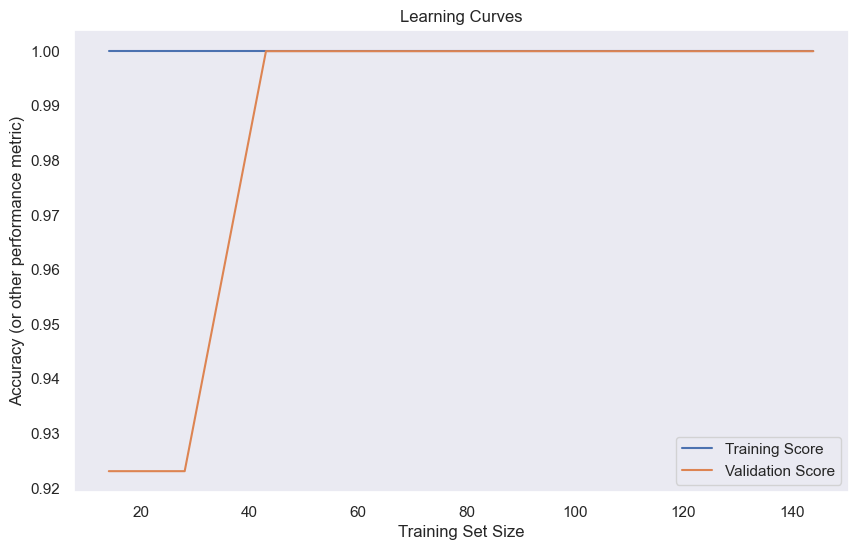

In [ ]:
#testing the leaning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_scores, label='Training Score')
plt.plot(training_sizes, val_scores, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy (or other performance metric)')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

## RFE (Recursive Feature Elimination) - Feature Selection and Better Modeling
RFE starts with all features and iteratively removes the least important feature (based on a selected model's feature importance measure) until the desired number of features is reached.

In [ ]:
from sklearn.linear_model import LogisticRegression
#importing RFE
from sklearn.feature_selection import RFE

# Create the RFE with a LogisticRegression estimator and 6 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

# Fits the eliminator to the data
rfe.fit(train_X, train_Y)

Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 fe

RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

In [ ]:
# Calculates the test set accuracy
acc = roc_auc_score(test_Y, rfe.predict(test_X))
print(f"{acc:.1%} roc_auc_score on test set.") 

# Calculates the train set accuracy
acc = roc_auc_score(train_Y, rfe.predict(train_X))
print(f"{acc:.1%} roc_auc_score on train set.") 

# Calculates the overall set accuracy
acc = roc_auc_score(Y, rfe.predict(X))
print(f"{acc:.1%} roc_auc_score on whole set.") 

100.0% roc_auc_score on test set.
100.0% roc_auc_score on train set.
100.0% roc_auc_score on whole set.


## Feature Importance with RFE

In [ ]:
cols=list(df.columns)
cols.remove("Divorce_Y_N")

# creates a dictionary where the keys are the column names, and the values are the rankings assigned to each feature by RFE
data=dict(zip(cols, rfe.ranking_))

#sorts the dictionary 'data' based on the ranking (from lowest to highest) and stores the sorted result in the rfe_data dictionary.
rfe_data= {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

n=1
for key, value in rfe_data.items():
    print(key, ' : ', value)
    if n==15:
        break
    n=n+1

happy  :  1
marriage  :  1
anxieties  :  1
idk_what's_going_on  :  1
accusations  :  1
hopes_wishes  :  2
begin_correct  :  3
dreams  :  4
no_hesitancy_inadequate  :  5
Aggro_argue  :  6
sudden_discussion  :  7
roles  :  8
good_to_leave_home  :  9
No_home_time  :  10
Sorry_end  :  11


<Axes: >

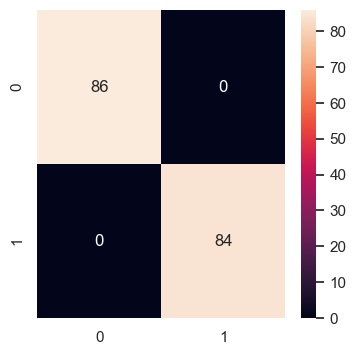

In [ ]:
ypred = rfe.predict(X)
cm = confusion_matrix(Y,ypred) 
sns.set(rc={'figure.figsize':(4,4)})
sns.heatmap(cm, annot=True)

[[TN  FP]
 [FN  TP]]
TP (True Positive): The model correctly predicted positive instances.
TN (True Negative): The model correctly predicted negative instances.
FP (False Positive): The model incorrectly predicted positive instances (Type I error).
FN (False Negative): The model incorrectly predicted negative instances (Type II error).

===> conclusion: no false predictions

[08:46:38] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.



<Axes: >

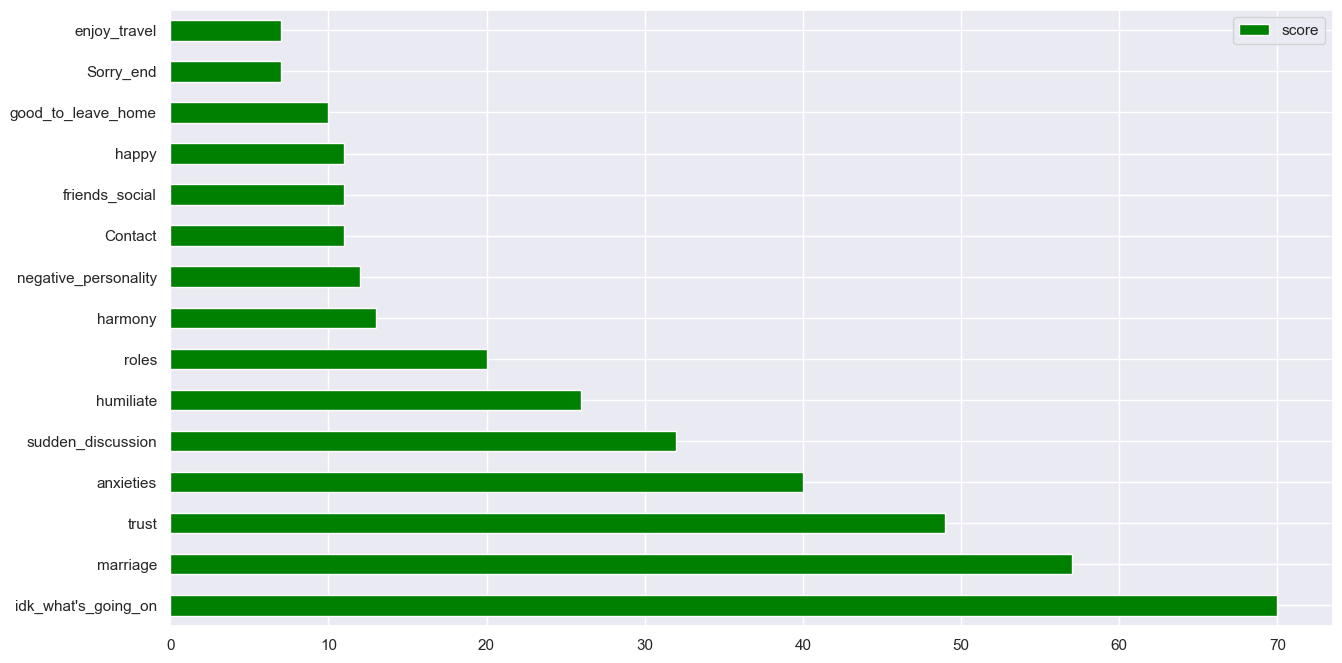

In [ ]:
classification_feature = "Divorce_Y_N"

# List of feature names (exclude the classification feature)
feature_names = [col for col in df.columns if col != classification_feature]

# Create a subset DataFrame with only the selected features
df_subset = df[feature_names]
xgb.fit(df_subset, df[classification_feature])  # Fit the model to the data


#extracts the feature importance scores from the XGBoost model
feature_important = xgb.get_booster().get_score(importance_type='weight')

#These lines separate the feature names (keys) and their importance scores (values) into separate lists.
keys = list(feature_important.keys())
values = list(feature_important.values())

#The resulting 'data' will contain the feature names in one column and their importance scores in another column
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

#selects the top 15 features with the highest importance scores using nlargest, and then creates a horizontal bar plot
data.nlargest(15, columns="score").plot(kind='barh', figsize = (15,8),color="green") 

In [ ]:
#just checking
data

,score
idk_what's_going_on,70.0
marriage,57.0
trust,49.0
anxieties,40.0
sudden_discussion,32.0
humiliate,26.0
roles,20.0
harmony,13.0
negative_personality,12.0
Contact,11.0


### Listing Top Features by XGB Only

In [ ]:
#creates a new column in the 'data' DataFrame called 'col_name' and assigns the index (feature names) to it.
data['col_name']=data.index

#creates a list tXGB that contains the top 5 feature
tXGB=list(data['col_name'][:5])
print("Top features using XGBoost only :",", ".join(tXGB))

Top features using XGBoost only : idk_what's_going_on, marriage, trust, anxieties, sudden_discussion


### Listing Top Features by RFE

In [ ]:
#put the top 6 features with the lowest RFE rankings in a list tRFE
tRFE= list(rfe_data.keys())[:6]
print("Top features using RFE :",", ".join(tRFE))

Top features using RFE : happy, marriage, anxieties, idk_what's_going_on, accusations, hopes_wishes


In [ ]:
#find the common features that are among the top features selected by both XGBoost and RFE
common=list(set(tRFE).intersection(set(tXGB)))

print("Top common features using XGBoost and RFE :",", ".join(common))

Top common features using XGBoost and RFE : marriage, anxieties, idk_what's_going_on


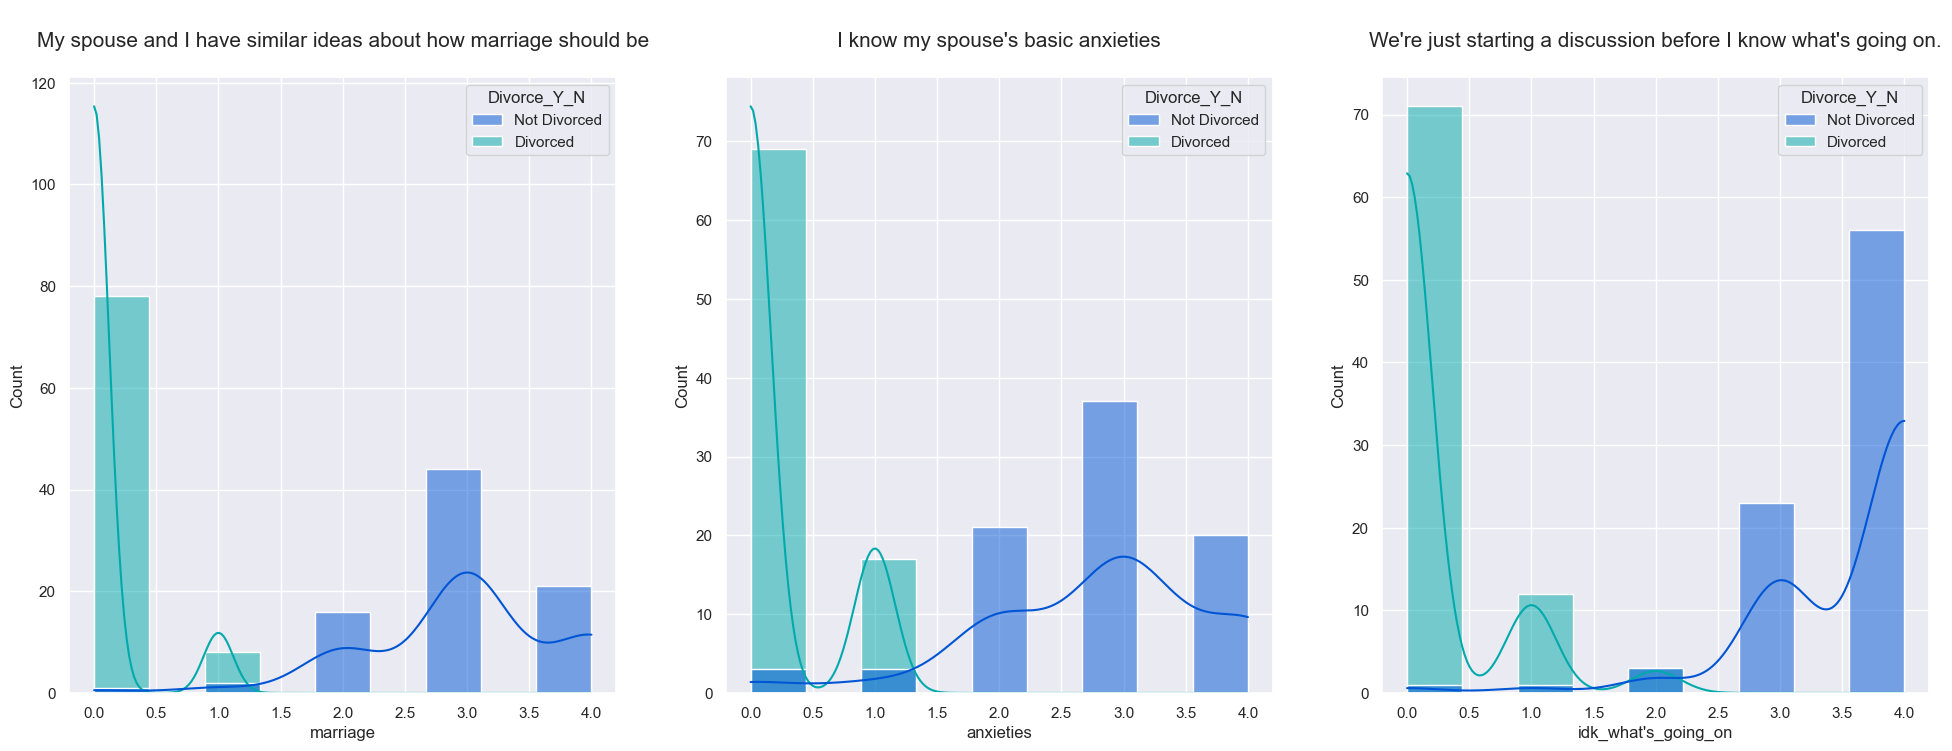

In [ ]:
#dictionary with descriptions
features_full={"marriage": "My spouse and I have similar ideas about how marriage should be", "idk_what's_going_on" : "We're just starting a discussion before I know what's going on.","trust" : "My spouse and I have similar values in trust.","anxieties" : "I know my spouse's basic anxieties"}
dfx=df.copy()
dfx["Divorce_Y_N"].replace({0: "Divorced", 1: "Not Divorced"}, inplace=True)
sns.set(rc={'figure.figsize':(24,8)})
plt.subplots_adjust(hspace = 0.4)

#kde=True adds a kernel density estimate to the plot
for i, column in enumerate(common, 1):
    plt.subplot(1,3,i)
    p=sns.histplot(x=column,data=dfx,hue="Divorce_Y_N",stat='count',kde=True,palette='winter')
    p.axes.set_title("\n"+str(features_full[column])+"\n",fontsize=15);

There are outliers in the 3 graphs Anxieties 

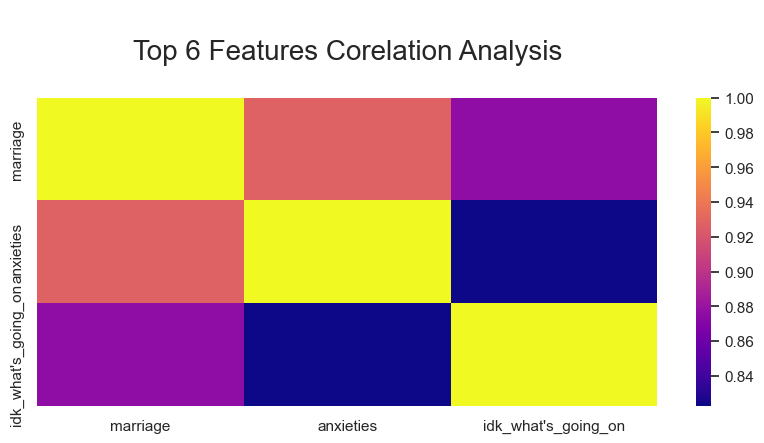

In [ ]:
#correlation between common features XGBoost and RFE
corr=df[common].corr()
sns.set(rc={'figure.figsize':(10,4)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="plasma")
p.axes.set_title("\nTop 6 Features Corelation Analysis\n",fontsize=20);

Highly correlated !!

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

primarily used for visualization and exploratory data analysis. It doesn't provide feature selection or dimensionality reduction for machine learning tasks.

# All features

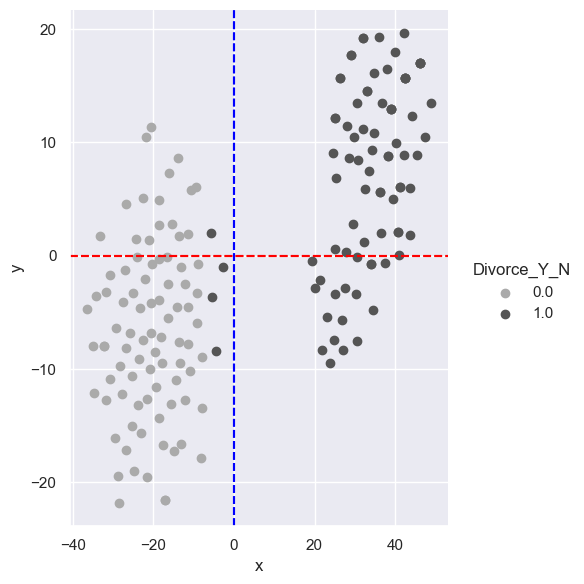

In [ ]:
cols=list(df.columns)
cols.remove("Divorce_Y_N")

#2D representation
#mapping high-dimensional data to a lower-dimensional space while preserving similarities/distances between data points.
tsne = manifold.TSNE(n_components=2, random_state=42)

#'transformed_data' contains the x and y coordinates of the data points in the lower-dimensional space
transformed_data = tsne.fit_transform(df[cols])

#new DataFrame 'tsne_df' combines the transformed data (x and y coordinates) with the "Divorce_Y_N" column from the original DataFrame df.
tsne_df = pd.DataFrame(np.column_stack((transformed_data, df["Divorce_Y_N"])),columns=["x",'y',"Divorce_Y_N"])

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid = sns.FacetGrid(tsne_df, hue="Divorce_Y_N", height=6, aspect=0.8 ,palette='binary')

grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["Divorce_Y_N"].quantile(0.5), color='blue')
grid.refline(y=tsne_df["Divorce_Y_N"].quantile(0.5), color='red');

# Top Features from RFE and XGBoost

Features used : idk_what's_going_on, accusations, sudden_discussion, trust, happy, anxieties, marriage, hopes_wishes


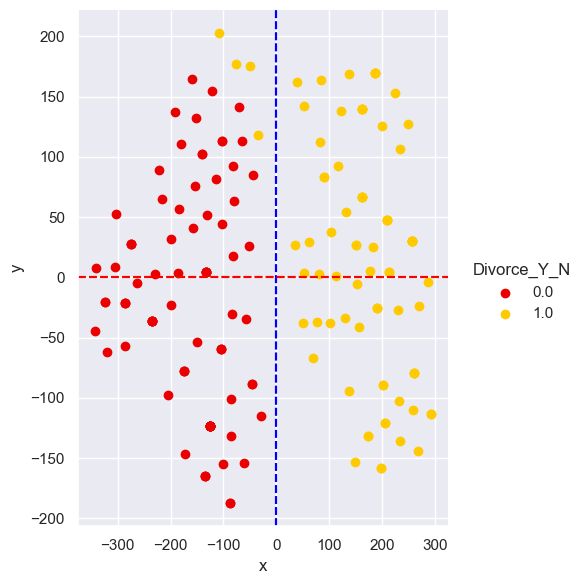

In [ ]:
# combine tRFE and tXGB results together
all_imp_f=list(set(tRFE).union(set(tXGB)))

print("Features used :",", ".join(all_imp_f))

#TSNE class, 2 coomppotents for easy visualization
tsne = manifold.TSNE(n_components=2, random_state=42)

#transforming data
transformed_data = tsne.fit_transform(df[all_imp_f])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, df["Divorce_Y_N"])),columns=["x",'y',"Divorce_Y_N"])

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid = sns.FacetGrid(tsne_df, hue="Divorce_Y_N", height=6, aspect=0.8,palette='hot')
grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["Divorce_Y_N"].quantile(0.5), color='blue')
grid.refline(y=tsne_df["Divorce_Y_N"].quantile(0.5), color='red');

# Top Common Features from all

Features used : marriage, anxieties, idk_what's_going_on


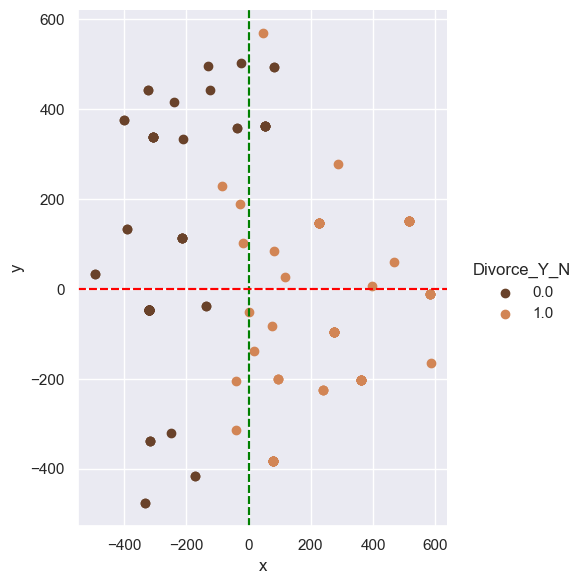

In [ ]:
#TSNE class, 2 coomppotents for easy visualization
tsne = manifold.TSNE(n_components=2, random_state=42)

print("Features used :",", ".join(common))

#transforming data
transformed_data = tsne.fit_transform(df[common])
tsne_df = pd.DataFrame(np.column_stack((transformed_data, df["Divorce_Y_N"])),columns=["x",'y',"Divorce_Y_N"])

#plotting TSNE transformed data
sns.set(rc={'figure.figsize':(15,10)})
grid = sns.FacetGrid(tsne_df, hue="Divorce_Y_N", height=6, aspect=0.8,palette='copper')
grid.map(plt.scatter, "x", "y").add_legend()
grid.refline(x=tsne_df["Divorce_Y_N"].quantile(0.1), color='green')
grid.refline(y=tsne_df["Divorce_Y_N"].quantile(0.1), color='red');

3 features only won't make a precise prediction, I will select the top 8 features for my prediction

In [ ]:
#showing the dataframe with top features only
df[['idk_what\'s_going_on', 'marriage', 'trust', 'hopes_wishes', 'anxieties', 'sudden_discussion', 'accusations', 'happy', 'Divorce_Y_N']]

,idk_what's_going_on,marriage,trust,hopes_wishes,anxieties,sudden_discussion,accusations,happy,Divorce_Y_N
0,3,0,1,0,0,3,3,0,1
1,4,4,2,0,1,2,4,4,1
2,3,3,2,2,2,3,1,3,1
3,4,3,4,1,1,4,3,3,1
4,1,1,1,2,2,2,3,1,1
...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,1,1,0,0
166,1,0,0,0,0,1,2,0,0
167,2,0,1,0,1,1,0,0,0
168,1,0,0,0,0,4,2,0,0


In [ ]:
top8Features = ['idk_what\'s_going_on', 'marriage', 'trust', 'hopes_wishes', 'anxieties', 'sudden_discussion', 'accusations', 'happy', 'Divorce_Y_N']

#make a copy of the dataset with only top features
dftest = df[topFeatures].copy()

#Train-test split new dataset
X=dftest.iloc[:, :-1]
Y=dftest['Divorce_Y_N']


#Modeling
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.15,random_state=3)
#new model for top features
xgbTest = XGBClassifier(learning_rate=0.02,subsample=0.8,min_child_weight=0.5,max_depth=4,gamma=1,colsample_bytree=0.8, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,random_state=3)
xgbTest.fit(train_X, train_Y)

#visualizing the validation score of the new model
scores = cross_val_score(xgbTest, train_X, train_Y, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

[08:46:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[08:46:49] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

Mean cross-validation score: 0.97


# FINAL RESULT

In [ ]:
#Input for predicting, customize it you want
input_data = np.array ([[4, 4, 4, 4, 4, 4, 4, 4]])  
predictions = xgbTest.predict(input_data)

if predictions == 0:
    print('predicated outcome of this marriage : Divorce!!')
else: print('predicated outcome of this marriage : They will keep their marriage :D')

predicated outcome of this marriage : They will keep their marriage :D
